**Diccionario**

| Nombre Columna | Descripción                                    | 
|----------------|------------------------------------------------|
| Comuna         | Comuna en la que se encuentra la propiedad     | 
| Propiedad      | Tipo de propiedad (Casa o Departamento)        | 
| Precio         | Precio de la propiedad                         | 
| Direccion      | Dirección "mas" exacta de la propiedad         | 
| Tamanios       | Tamaño en m2 de la propiedad                   | 
| Dormitorios    | Número de dormitorios que posee la propiedad   | 
| Baños          | Número de baños que posee la propiedad         | 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("propiedadesgranconcepcion.xlsx")
df

,Comuna,Propiedad,Precio,Direccion,Tamanios,Dormitorios,Baños
0,"['Tomé, Biobío']",Casa,5.990,"Pingueral, Tomé, Biobío",['559 m² totales'],['4 dormitorios'],['2 baños']
1,"['Tomé, Biobío']",Casa,7.900,"Avenida Pingueral, Tomé, Chile, Pingueral, Tom...",['1068 m² totales'],['4 dormitorios'],['4 baños']
2,"['Tomé, Biobío']",Casa,8.120,"Bella Casa Con Piscina 3d 2b T350 M2 , Tomé, T...",['350 m² totales'],['3 dormitorios'],['2 baños']
3,"['Tomé, Biobío']",Casa,6.900,"Avenida Pingueral, Tomé, Chile, Pingueral, Tom...",['560 m² totales'],['4 dormitorios'],['3 baños']
4,"['Tomé, Biobío']",Casa,33.700,"Avenida Pingueral, Tomé, Chile, Pingueral, Tom...",['875 m² totales'],['6 dormitorios'],['4 baños']
...,...,...,...,...,...,...,...
3110,"['Chiguayante, Biobío']",Departamento,2.373,"Esperanza 507, Chiguayante, Chile, La Leonera,...",[],[],[]
3111,"['Chiguayante, Biobío']",Departamento,5.000,"La Leonera, Chiguayante, Biobío",['85 m² totales'],['2 dormitorios'],['2 baños']
3112,"['Chiguayante, Biobío']",Departamento,74.000.000,"Esperanza 507, Chiguayante, Chile, La Leonera,...",['59 m² totales'],['3 dormitorios'],['1 baño']
3113,"['Chiguayante, Biobío']",Departamento,350.000.000,"Sanhueza 55, Concepción, Chile, Lonco, Chiguay...",['145 m² totales'],['4 dormitorios'],['3 baños']


**Preprocesamiento**

In [2]:
#Verificamos el tipo de dato de las variables, la cantidad de datos y si existen valores nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Comuna       3115 non-null   object
 1   Propiedad    3115 non-null   object
 2   Precio       3115 non-null   object
 3   Direccion    3115 non-null   object
 4   Tamanios     3115 non-null   object
 5   Dormitorios  3115 non-null   object
 6   Baños        3115 non-null   object
dtypes: object(7)
memory usage: 170.5+ KB


In [3]:
#Observamos que la variable Tamanios se refiere a Tamaño por lo que se modificará su nombre

df.rename(columns={'Tamanios': 'Tamaño en m2'}, inplace=True)

In [4]:
#Observamos si existen filas duplicadas

df.duplicated().sum()


38

In [5]:
#Borramos las filas duplicadas

df.drop_duplicates()

,Comuna,Propiedad,Precio,Direccion,Tamaño en m2,Dormitorios,Baños
0,"['Tomé, Biobío']",Casa,5.990,"Pingueral, Tomé, Biobío",['559 m² totales'],['4 dormitorios'],['2 baños']
1,"['Tomé, Biobío']",Casa,7.900,"Avenida Pingueral, Tomé, Chile, Pingueral, Tom...",['1068 m² totales'],['4 dormitorios'],['4 baños']
2,"['Tomé, Biobío']",Casa,8.120,"Bella Casa Con Piscina 3d 2b T350 M2 , Tomé, T...",['350 m² totales'],['3 dormitorios'],['2 baños']
3,"['Tomé, Biobío']",Casa,6.900,"Avenida Pingueral, Tomé, Chile, Pingueral, Tom...",['560 m² totales'],['4 dormitorios'],['3 baños']
4,"['Tomé, Biobío']",Casa,33.700,"Avenida Pingueral, Tomé, Chile, Pingueral, Tom...",['875 m² totales'],['6 dormitorios'],['4 baños']
...,...,...,...,...,...,...,...
3110,"['Chiguayante, Biobío']",Departamento,2.373,"Esperanza 507, Chiguayante, Chile, La Leonera,...",[],[],[]
3111,"['Chiguayante, Biobío']",Departamento,5.000,"La Leonera, Chiguayante, Biobío",['85 m² totales'],['2 dormitorios'],['2 baños']
3112,"['Chiguayante, Biobío']",Departamento,74.000.000,"Esperanza 507, Chiguayante, Chile, La Leonera,...",['59 m² totales'],['3 dormitorios'],['1 baño']
3113,"['Chiguayante, Biobío']",Departamento,350.000.000,"Sanhueza 55, Concepción, Chile, Lonco, Chiguay...",['145 m² totales'],['4 dormitorios'],['3 baños']


In [6]:
#Buscamos si en la vaiable Dormitorios se encuentra la letra "a"

filas_con_a = df[df['Dormitorios'].str.contains('a', case=False)]

print(filas_con_a)

                       Comuna     Propiedad       Precio  \
97           ['Tomé, Biobío']  Departamento        5.490   
111    ['Talcahuano, Biobío']          Casa        5.550   
204    ['Talcahuano, Biobío']          Casa        4.400   
215    ['Talcahuano, Biobío']          Casa  160.000.000   
221    ['Talcahuano, Biobío']          Casa        3.500   
...                       ...           ...          ...   
2749   ['Concepción, Biobío']  Departamento        1.590   
2760   ['Concepción, Biobío']  Departamento        2.241   
2893  ['Chiguayante, Biobío']          Casa        3.500   
3018  ['Chiguayante, Biobío']  Departamento        2.900   
3019  ['Chiguayante, Biobío']  Departamento        2.911   

                                              Direccion  \
97    Pedro Leon Ugalde 45, Dichato, Tomé, Chile, Di...   
111     Calle Tierras Coloradas S/n, Talcahuano, Biobío   
204   Calle Nueva 100, Talcahuano, Chile, Talcahuano...   
215   Condominio Cipreces De Malaga, Carrie

Como podemos observar al buscar las filas de la variable Dormitorios que contengan la letra "a" obtenemos dos tipos de resultados siendo estos por ejemplo: 
['3 a 4 dormitorios'] o ['2 baños'], en el primer caso esto ocurre por que al hacer webscraping habían anuncios de proyectos inmobiliarios donde existían distintos modelos de propiedades y en el segundo caso ocurre cuando faltan algunos datos y la información de la variable Baño se corre un lugar hacia al lado.
Estos dos casos se eliminaran ya que de los proyectos inmobiliarios no hay mayor información y por otro lado se necesita tener la información completa.

In [7]:
#Dejamos en nuestro data frame solo las filas que NO contienen la letra "a" en la variable Dormitorio

df  = df[~df['Dormitorios'].str.contains('a')]


Como se observa en el inicio todas las variables son de tipo "object", sin embargo las variables Tamaño en m2, Dormitorios, Baños, Precio, son valores númericos por lo que se deben cambiar a "int" pero antes de esto se deben eliminar los caracteres y palabras que se encuentran en estas variables.

In [8]:
#En la variable Comuna se deja solo el nombre de esta eliminando caracteres y el nombre de la región en las demas variables se eliminan los caracteres dejando solo el número

df['Comuna'] = df['Comuna'].str.split(',').str[0]
df['Comuna'] = df['Comuna'].str.split('\'').str[-1]
df['Tamaño en m2'] = df['Tamaño en m2'].str.extract('(\d+)')
df['Dormitorios'] = df['Dormitorios'].str.extract('(\d+)')
df['Baños'] = df['Baños'].str.extract('(\d+)')

C:\Users\danie\AppData\Local\Temp\ipykernel_36532\2098561331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comuna'] = df['Comuna'].str.split(',').str[0]
C:\Users\danie\AppData\Local\Temp\ipykernel_36532\2098561331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comuna'] = df['Comuna'].str.split('\'').str[-1]
C:\Users\danie\AppData\Local\Temp\ipykernel_36532\2098561331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [9]:
#Luego de estas modificaciones observamos si existen valores nulos.

df.isna().sum().sum()



55

In [10]:
#Se eliminan filas que poseen valores nulos.

df = df.dropna()

In [11]:
#Se modifica el tipo de variables de Precio, Dormitorios, Tamaño en m2 y Baños pasando a "int".
#Antes de modificar la variable Precio se debió eliminar los puntos que poseían los numeros.

df['Precio'] = df['Precio'].str.replace('.', '', regex=True).astype(int)
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
df['Dormitorios'] = pd.to_numeric(df['Dormitorios'], errors='coerce')
df['Tamaño en m2'] = pd.to_numeric(df['Tamaño en m2'], errors='coerce')
df['Baños'] = pd.to_numeric(df['Baños'], errors='coerce')

In [12]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2981 entries, 0 to 3114
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Comuna        2981 non-null   object
 1   Propiedad     2981 non-null   object
 2   Precio        2981 non-null   int32 
 3   Direccion     2981 non-null   object
 4   Tamaño en m2  2981 non-null   int64 
 5   Dormitorios   2981 non-null   int64 
 6   Baños         2981 non-null   int64 
dtypes: int32(1), int64(3), object(3)
memory usage: 174.7+ KB


,Comuna,Propiedad,Precio,Direccion,Tamaño en m2,Dormitorios,Baños
0,Tomé,Casa,5990,"Pingueral, Tomé, Biobío",559,4,2
1,Tomé,Casa,7900,"Avenida Pingueral, Tomé, Chile, Pingueral, Tom...",1068,4,4
2,Tomé,Casa,8120,"Bella Casa Con Piscina 3d 2b T350 M2 , Tomé, T...",350,3,2
3,Tomé,Casa,6900,"Avenida Pingueral, Tomé, Chile, Pingueral, Tom...",560,4,3
4,Tomé,Casa,33700,"Avenida Pingueral, Tomé, Chile, Pingueral, Tom...",875,6,4


En la Variable Precio hay valores que se encuentran en UF y otros en Pesos Chilenos (CLP) para una mejor comprension de estos se modificaran para dejarlos todos en Pesos Chilenos.

In [13]:
precios_menores_50000 = df.loc[df['Precio'] < 50000, 'Precio']

# Mostrar los valores resultantes
print(precios_menores_50000)

0        5990
1        7900
2        8120
3        6900
4       33700
        ...  
3105     4900
3106     4500
3108     2650
3111     5000
3114     4100
Name: Precio, Length: 2143, dtype: int32


In [14]:
df.loc[df['Precio'] < 50000, 'Precio'] *= 36936.38

# Convertir la columna 'Precio' a enteros
df['Precio'] = df['Precio'].astype(int)

# Mostrar el DataFrame actualizado
print(df)

           Comuna     Propiedad      Precio  \
0            Tomé          Casa   221248916   
1            Tomé          Casa   291797402   
2            Tomé          Casa   299923405   
3            Tomé          Casa   254861021   
4            Tomé          Casa  1244756006   
...           ...           ...         ...   
3109  Chiguayante  Departamento    60000000   
3111  Chiguayante  Departamento   184681900   
3112  Chiguayante  Departamento    74000000   
3113  Chiguayante  Departamento   350000000   
3114  Chiguayante  Departamento   151439158   

                                              Direccion  Tamaño en m2  \
0                               Pingueral, Tomé, Biobío           559   
1     Avenida Pingueral, Tomé, Chile, Pingueral, Tom...          1068   
2     Bella Casa Con Piscina 3d 2b T350 M2 , Tomé, T...           350   
3     Avenida Pingueral, Tomé, Chile, Pingueral, Tom...           560   
4     Avenida Pingueral, Tomé, Chile, Pingueral, Tom...           875 

El último paso que se realizará en este preprocesamiento será buscar algunos valores anomalos, que en este caso radican del error humano de las personas al publicar los avisos de venta y como se mencionó mas arriba solo se buscan datos completos y "buenos"

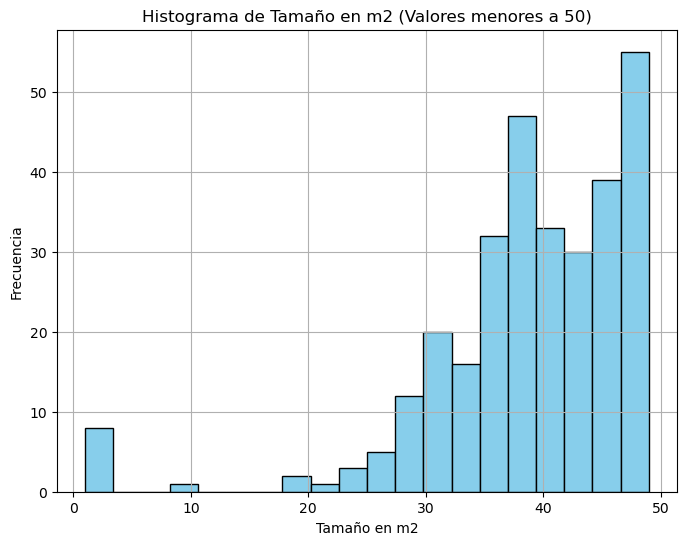

In [15]:
#Los primeros valores anómalos que se buscan son los de la variable Tamaño en m2, para esto se graficarán en primera instancia los valores menores a 50 m2
#esto para poder ver con mayor detalle valores anómalos pequeños



df_filtrado = df[df['Tamaño en m2'] < 50]


plt.figure(figsize=(8, 6))  
df_filtrado['Tamaño en m2'].plot.hist(color='skyblue', edgecolor='black', bins=20) 
plt.title('Histograma de Tamaño en m2 (Valores menores a 50)')  
plt.xlabel('Tamaño en m2')  
plt.ylabel('Frecuencia')  
plt.grid(True)  
plt.show()  

Como se puede observar hay valores cercanos a 1 m2 por lo que se procederá a eliminar estos datos

In [16]:
#Se eliminan los valores en la variable "Tamaño en m2" menores a 15 m2 dejando así solo valores mayores o iguales a 15 m2

df = df[df['Tamaño en m2'] >= 15]


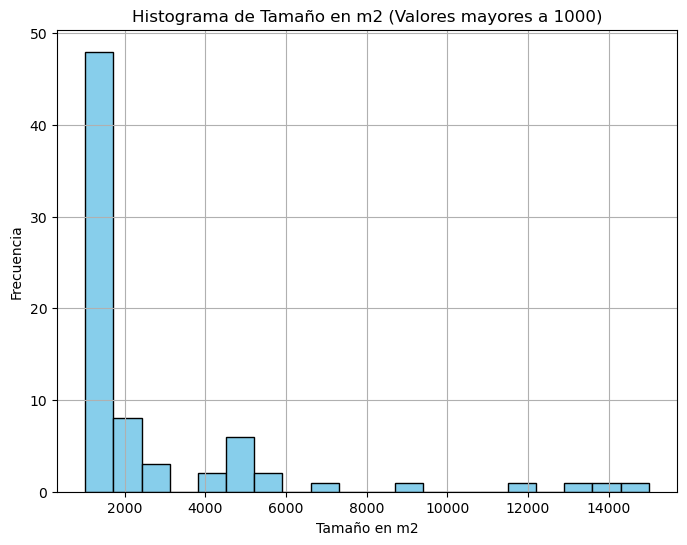

In [17]:
#Ahora se buscan valores anómalos mayores para esto se filtra los valores mayores a 1000 para poder ver con mayor mayor detalle estos valores.


df_filtrado = df[df['Tamaño en m2'] > 1000]


plt.figure(figsize=(8, 6))  # Tamaño del gráfico
df_filtrado['Tamaño en m2'].plot.hist(color='skyblue', edgecolor='black', bins=20)  # Plot del histograma
plt.title('Histograma de Tamaño en m2 (Valores mayores a 1000)')  # Título del gráfico
plt.xlabel('Tamaño en m2')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.grid(True)  # Habilitar cuadrícula
plt.show()  # Mostrar el gráfico

En este caso no se consideran valores anómalos ya que pueden existir terrenos de esta cantidad de m2, se buscaban valores que se escaparan de lo normal como cientos de miles o millones.

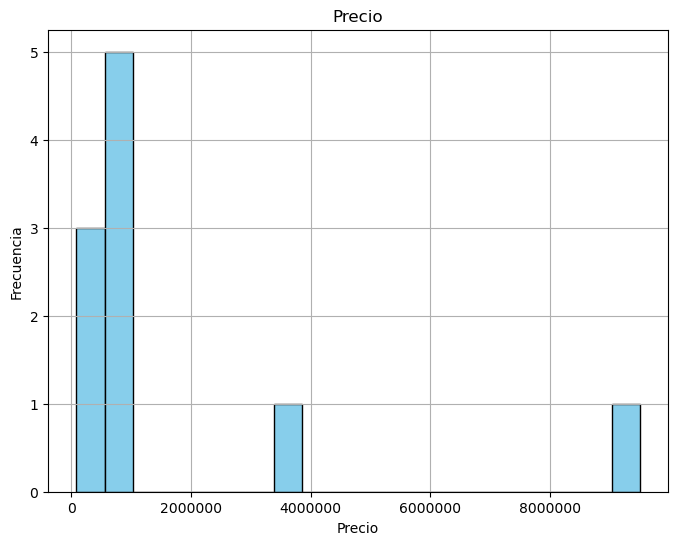

In [18]:
#Se realiza el mismo procedimiento con la variable "Precio", en este caso se filtran valores menores a $10.000.000

df_filtrado = df[df['Precio'] < 10000000]

plt.figure(figsize=(8, 6))
df_filtrado['Precio'].plot.hist(color='skyblue', edgecolor='black', bins=20)
plt.title('Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)

# Cambiar el formato del eje x a notación regular
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [19]:
#En este caso también se buscan las filas que poseen estos valores pequeños para corroborar si existe error

errorprecio = df[df['Precio'] < 10000000]

# Mostrar las filas resultantes
print(errorprecio)

                   Comuna     Propiedad   Precio  \
129            Talcahuano          Casa   140000   
301            Talcahuano  Departamento   850000   
461   San Pedro de la Paz          Casa    82600   
797   San Pedro de la Paz  Departamento   850000   
904   San Pedro de la Paz  Departamento   200000   
2015           Concepción  Departamento  9500000   
2041           Concepción  Departamento   800000   
2703           Concepción  Departamento  3500000   
2761           Concepción  Departamento   701791   
2762           Concepción  Departamento   600000   

                                              Direccion  Tamaño en m2  \
129   Pichamávida, Sector Cruz Del Sur, Carriel, Tal...           300   
301   Vasco Núñez De Balboa, Talcahuano, Chile, Carr...            71   
461   Ernesto Pinto Lagarrigue, Km 1.5, San Pedro De...         14000   
797   Avenida Los Parques, San Pedro De La Paz, Chil...           180   
904   Avenida Costaner 7488 Edificio Bosque Mar, San...       

Viendo las caracteristicas de las propiedades que tienen un valor menor a $10.000.000 podemos decir que su valor se puede deber a un error de tipeo por lo que se borrarán estos datos.

In [20]:
df = df[df['Precio'] >= 10000000]


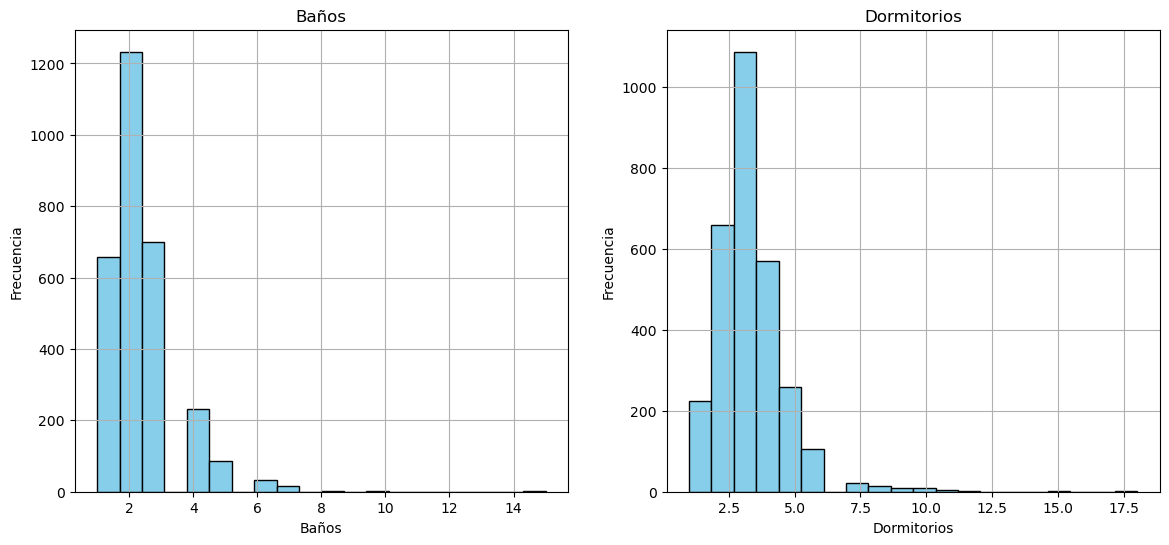

In [21]:
#Ahora se grafican las variables Baños y Dormitorios

plt.figure(figsize=(14, 6))

#Baños
plt.subplot(1, 2, 1)
df['Baños'].plot.hist(color='skyblue', edgecolor='black', bins=20)
plt.title('Baños')
plt.xlabel('Baños')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')

#Dormitorios
plt.subplot(1, 2, 2)
df['Dormitorios'].plot.hist(color='skyblue', edgecolor='black', bins=20)
plt.title('Dormitorios')
plt.xlabel('Dormitorios')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')


plt.show()


Se pueden observar algunas propiedades que tienen una gran cantidad de baños y dormitorios en comparación a una vivienda "normal" por lo que se observarán todas las caracteristicas de estos datos.

In [22]:
#Se filtran los datos de las propiedades que tienen mas de 6 dormitorios

errordormitorios = df[df['Dormitorios'] > 6]

# Mostrar las filas resultantes
print(errordormitorios)

                   Comuna     Propiedad      Precio  \
57                   Tomé          Casa   697728218   
60                   Tomé          Casa   697728218   
67                   Tomé          Casa   110735267   
124            Talcahuano          Casa   165000000   
163            Talcahuano          Casa   130000000   
166            Talcahuano          Casa   153800000   
251            Talcahuano          Casa   339445332   
256            Talcahuano          Casa   250000000   
365   San Pedro de la Paz          Casa   690710306   
372   San Pedro de la Paz          Casa   620531184   
459   San Pedro de la Paz          Casa   690710306   
522   San Pedro de la Paz          Casa   690710306   
528   San Pedro de la Paz          Casa   583594804   
559   San Pedro de la Paz          Casa   620531184   
654   San Pedro de la Paz          Casa   690710306   
710   San Pedro de la Paz          Casa   554045700   
1212               Hualpé          Casa    89000000   
1324      

Al observar todas las caracteristícas de estos datos se decide mantenerlos ya que son propiedades de un tamaño considerable para mantener todas estas habitaciones y muchas de ellas están en barrios universitarios por lo que pueden estar asociadas al arriendo de piezas para universitarios por lo que no se considerarán como errores de tipeo.

In [23]:
df

,Comuna,Propiedad,Precio,Direccion,Tamaño en m2,Dormitorios,Baños
0,Tomé,Casa,221248916,"Pingueral, Tomé, Biobío",559,4,2
1,Tomé,Casa,291797402,"Avenida Pingueral, Tomé, Chile, Pingueral, Tom...",1068,4,4
2,Tomé,Casa,299923405,"Bella Casa Con Piscina 3d 2b T350 M2 , Tomé, T...",350,3,2
3,Tomé,Casa,254861021,"Avenida Pingueral, Tomé, Chile, Pingueral, Tom...",560,4,3
4,Tomé,Casa,1244756006,"Avenida Pingueral, Tomé, Chile, Pingueral, Tom...",875,6,4
...,...,...,...,...,...,...,...
3109,Chiguayante,Departamento,60000000,"Esperanza 507, Chiguayante, Chile, La Leonera,...",53,3,1
3111,Chiguayante,Departamento,184681900,"La Leonera, Chiguayante, Biobío",85,2,2
3112,Chiguayante,Departamento,74000000,"Esperanza 507, Chiguayante, Chile, La Leonera,...",59,3,1
3113,Chiguayante,Departamento,350000000,"Sanhueza 55, Concepción, Chile, Lonco, Chiguay...",145,4,3


In [24]:
#Se agrega una columna ID al dataframe

df['ID'] = df.index

In [25]:
#Se observan los datos por ultima vez

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2962 entries, 0 to 3114
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Comuna        2962 non-null   object
 1   Propiedad     2962 non-null   object
 2   Precio        2962 non-null   int32 
 3   Direccion     2962 non-null   object
 4   Tamaño en m2  2962 non-null   int64 
 5   Dormitorios   2962 non-null   int64 
 6   Baños         2962 non-null   int64 
 7   ID            2962 non-null   int64 
dtypes: int32(1), int64(4), object(3)
memory usage: 196.7+ KB


In [26]:
#SE EXPORTA UN NUEVO ARCHIVO

df.to_csv("pgcf.csv", index=False)
